In [1]:
%reset -f
import numpy as np
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
import scipy as sc
# from __future__ import unicode_literals
import matplotlib.pyplot as plt
from scipy import signal

# Plotting preparation
import sys
sys.path.append('../')
from plot_configuration import *
pi2 = np.pi*2

# Set style of plots
# colwidth=3.5
# figwidth=6
# figheight=4.5
# ticksize= 8 *figwidth/colwidth 
# labelsize=10 *figwidth/colwidth
# titlesize = 10 *figwidth/colwidth
# annotatesize= ticksize*1

# mpl.style.use('classic')
# mpl.rcParams.update({'font.size':ticksize }) 
# mpl.rcParams.update({'legend.fontsize':ticksize })# legend
# mpl.rcParams.update({'ytick.labelsize':ticksize})
# mpl.rcParams.update({'xtick.labelsize':ticksize})
# mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
# mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
# mpl.rcParams.update({'figure.titlesize' :titlesize})
# mpl.rcParams.update({'savefig.bbox':'tight'})
# mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
# mpl.rcParams.update({'figure.figsize':[figwidth,figheight]})
# mpl.rcParams.update({'image.cmap':'rainbow'})
# mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis

# # Use latex (must be before use_mathtext:True)
# flag_latex=1
# if flag_latex:
#     # To be able to use SI units as micro (automatically upright)
#     params = {'text.usetex':True, 'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}',r'\usepackage{mathastext}']}
#     mpl.rcParams.update(params)
# else:
#     mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4  (NOT IF USING TEX)
    
    
    
# # mpl.rc('font', family = 'sans-serif')

# # mpl.rcParams.update({'mathtext.fontset':'cm'})
# mpl.rcParams.update({'font.style':'normal'})
# mpl.rcParams['mathtext.fontset'] = 'custom'
# mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

Finished configuring the plots.


In [2]:
%matplotlib notebook


# Single bunch centroid, evolution of centroid

In [13]:
def rotate(x,p,C,S):
    temp = x
    x = temp*C + p*S
    p = -S*temp+ p*C
    return x,p

def whitenoise(N,std=1):
    return np.random.normal(0,std,N)

def filt_bunches(Nt,Np,filt,std=1,dt=1,fl=0,fh=0):
    xt= np.random.normal(0,std,Nt*Np)
    xt = xt.reshape(Nt,Np)
    xf= np.fft.rfft(xt,axis=0)
    ff= np.fft.rfftfreq(Nt,d=dt)
    
    if filt==0:
        # White Noise 
        pass
    elif filt==1:
        #Pink
        ind = ff>ff[2]
        print(N,dt,xf.shape)
        xf[ind,:] = xf[ind,:]*(ff[2]/(ff[ind,np.newaxis]))**.5
    elif filt==2:
        ind = np.logical_and(ff>fl/dt,ff<fh/dt)        
        xf[ind,:] *= 0
    elif filt==3:
        df = (fh-fl)/2/dt
        mf = (fh+fl)/2/dt
        xf *= np.exp(-0.5*(ff[:,np.newaxis]-mf)**2/df**2)
    else: 
        print("Not implemented in filt_bunches")

    xt2 = np.fft.irfft(xf,axis=0)
#     xt2 = (xt2-np.mean(xt2,axis=0))*std/np.std(xt2,axis=0)
    return xt2


def filt_beam(Nt,Np,filt,std=1,dt=1,fl=0,fh=0):
    N = Nt*Np
    xt= np.random.normal(0,std,N)
    xt = xt.reshape(N,1)
    xf= np.fft.rfft(xt,axis=0)
    ff= np.fft.rfftfreq(N,d=dt/Np)
    
    if filt==0:
        # White Noise 
        pass
    elif filt==1:
        ind = ff>ff[2]
        xf[ind,:] = xf[ind,:]*(ff[2]/(ff[ind,np.newaxis]))**.5
    elif filt==2:
        print(N,dt,xf.shape,ff)
        fs = 1/dt
        df = (fh-fl)/2
        mf = ((fh+fl)/2)%fs
        print(ff)
        for i in range(0,Np+1,1):
            print('filt_beam kind 2',i*fs)
            for sign in [-1,1]:
                fli = fs*(i +sign*mf-df)
                fhi = fs*(i +sign*mf+df)
                ind = np.logical_and(ff>fli,ff<fhi)
                xf[ind,:] *= 0
        print("Not working yet")
    elif filt==3:
        ind = ff>fh
        xf[ind]=0
#         print("not implemented filt==3 for full beam yet")
    else: 
        print("Not implemented in filt_beam")    
    xt2 = np.fft.irfft(xf,axis=0)
    xt2 = (xt2-np.mean(xt2,axis=0))*std/np.std(xt2,axis=0)
    return xt2

def pinknoise(N,std=1,dt=1,Np=1):
    Nt= int(N/Np)
#     xt= np.random.normal(0,std,N)
#     xt = xt.reshape(Nt,Np)
#     xf= np.fft.rfft(xt,axis=0)
#     ff= np.fft.rfftfreq(Nt,d=dt)
#     ind = ff>ff[2]
#     print(N,dt,xf.shape)
#     xf[ind,:] = xf[ind,:]*(ff[2]/(ff[ind,np.newaxis]))**.5
#     xt2 = np.fft.irfft(xf,axis=0)
#     xt2 = (xt2-np.mean(xt2,axis=0))*std/np.std(xt2,axis=0)
#     return xt2
    return filt_bunches(Nt,Np,filt=1,std=std,dt=dt)


def pinknoise2(N,std=1,dt=1,Np=1):
    Nt= int(N/Np)
#     xt= np.random.normal(0,std,N)
#     xt = xt.reshape(N,1)
#     xf= np.fft.rfft(xt,axis=0)
#     ff= np.fft.rfftfreq(N,d=dt/Np)
#     print('pink f',ff)
#     ind = ff>ff[2]
#     print(N,dt,xf.shape)
#     xf[ind,:] = xf[ind,:]*(ff[2]/(ff[ind,np.newaxis]))**.5
#     xt2 = np.fft.irfft(xf,axis=0)
#     xt2 = (xt2-np.mean(xt2,axis=0))*std/np.std(xt2,axis=0)
    return filt_beam(Nt,Np,filt=1,std=std,dt=dt)


def whitenoise_notatbunch(N,fl,fh,std=1,dt=1,Np=1):
#     xt= np.random.normal(0,std,N)
#     xf= np.fft.rfft(xt)
#     ff= np.fft.rfftfreq(N,d=dt/Np)
#     print('filt f',ff)
#     for ip in range(Np):
#         ind = np.logical_and(ff>fl*(1+ip),ff<fh*(1+ip))
#         xf[ind] *= 0
#     xt2 = np.fft.irfft(xf)
#     xt2 = (xt2-np.mean(xt2))*std/np.std(xt2)
#     return xt2
    Nt = int(N/Np)
    return filt_bunches(Nt,Np,filt=2,std=std,dt=dt,fl=fl,fh=fh)

        
def whitenoise_notatbunch2(N,fl,fh,std=1,dt=1,Np=1):
    Nt = int(N/Np)
    return filt_beam(Nt,Np,filt=2,std=std,dt=dt,fl=fl,fh=fh)
    

def damperlowBW(x,g):
    return x-np.mean(x)*g
    


In [67]:
x0 = 0
p0 = 2*0
sigma_n = 1e-3
g=1

Qx = 0.31
df = 0.01
CX = np.cos(2*np.pi*Qx)
SX = np.sin(2*np.pi*Qx)

dt = 25e-9
dt=  1
w0=1/dt
Nt = int(1024*2**4)
turns = np.arange(Nt)
Np= int(32)
NSLOTS= Np
fcoh = 10

# wkicks = whitenoise(Nt*Np,sigma_n).reshape(Nt,Np)
# pkicks = pinknoise(Nt*Np,sigma_n,dt=dt,Np=Np).reshape(Nt,Np)
# pkicks2 = pinknoise2(Nt*Np,sigma_n,dt=dt,Np=Np).reshape(Nt,Np)

# filtkicks=whitenoise_notatbunch(Nt*Np,Qx-df,Qx+df,std=sigma_n,dt=dt,Np=Np).reshape(Nt,Np)
# filtkicks2=whitenoise_notatbunch2(Nt*Np,Qx-df,Qx+df,std=sigma_n,dt=dt,Np=Np).reshape(Nt,Np)
# sinkicks= np.sin(2*np.pi*(Qx+df)*np.arange(Nt*Np)) *sigma_n *np.sqrt(2)
# kicks = pkicks  ; 
    
filt = 3
flag_singlebunch=0
if flag_singlebunch: 
    kicks = filt_bunches(Nt,NSLOTS,filt,sigma_n,dt,Qx-df,Qx+df).reshape(Nt,NSLOTS)
else:
#     kicks = filt_beam(   Nt,NSLOTS,filt,sigma_n,dt,Qx-df,Qx+df).reshape(Nt,NSLOTS)
    kicks = filt_beam(   Nt,NSLOTS,filt,sigma_n,dt,0,fcoh/(dt)).reshape(Nt,NSLOTS)


print('Kick std',np.std(kicks))

x=np.zeros((Nt,NSLOTS)) ; x[-1]=x0
p=np.zeros((Nt,NSLOTS)) ; p[-1]=p0
for t in range(Nt):
    x[t,:Np],p[t,:Np] = rotate(x[t-1,:Np],p[t-1,:Np],CX,SX)
    p[t,:Np] += kicks[t,:Np]
#     x[t] = damperlowBW(x[t],g)


Jt = .5*(x[-1,:]**2+p[-1,:]**2)
varJ = np.var(Jt-.5*p0**2)/(2*dt*Nt)
if Np==1:
    varJ = np.var(.5*(x**2+p**2))/(2*dt*Nt/2)
    
    
#Find p(w)
Nw2 = np.abs(np.fft.rfft(kicks[:,:],axis=0,norm='ortho'))**2  *dt
pw2 = np.abs(np.fft.rfft(p[:,:],axis=0,norm='ortho'))**2  *dt
ff = np.fft.rfftfreq(Nt,dt)
print('Nw2',ff.shape,Nw2.shape,kicks.shape)
# ff,Nw2 = signal.welch(kicks[:,:],1/dt,axis=0)
# ff,pw2 = signal.welch(p[:,:],1/dt,axis=0)
# Nw2 *= 1/(2) ; pw2 *= 1/(2)
print('Nw2',ff.shape,Nw2.shape,kicks.shape)
if Np>1:
    Nw2 = np.mean(Nw2,axis=1)
    pw2 = np.mean(pw2,axis=1)

Dw = pw2*Nw2

Dtt = np.fft.irfft(Dw,norm='ortho')
D = np.sum(Dtt)/(2*dt) *100*2.5
D = np.sum(Dw)*(ff[1]-ff[0]) 
ind_Q = np.searchsorted(ff,w0*Qx)
interp = sc.interpolate.interp1d(ff,Nw2,bounds_error=False,fill_value=None)
print('D  = %.2e , %.2e , %.2e , %.2e , %.2e'%(
        D, np.mean(p[:,0]**2)*np.var(kicks[:,0])/dt/2,varJ, 
        w0**2*.5*p0**2*Nw2[ind_Q]/2,w0**2*.5*p0**2*interp(w0*Qx)/2))


Pac = np.fft.irfft(pw2,norm='ortho')/8
Nac = np.fft.irfft(Nw2,norm='ortho')/8
print('Nac= %.2e , %.2e '%(np.max(Nac),np.var(kicks[:,0])))
print('Pac',np.max(Pac),p0**2)

# plt.figure()
# plt.plot(Dw)

Kick std 0.0010000000000000002
Nw2 (8193,) (8193, 32) (16384, 32)
Nw2 (8193,) (8193, 32) (16384, 32)
D  = 1.25e-09 , 1.01e-09 , 1.16e-09 , 0.00e+00 , 0.00e+00
Nac= 1.60e-05 , 9.99e-07 
Pac 0.049658513352250584 0


<IPython.core.display.Javascript object>


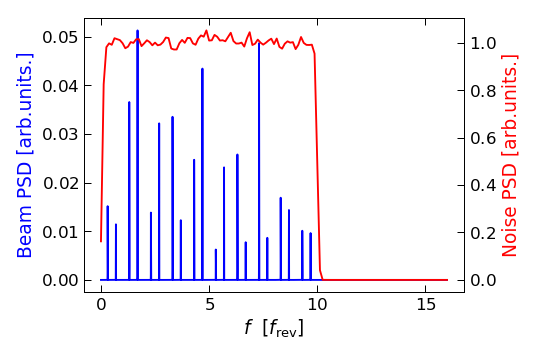

1.69140625 0.051279141957095126


In [79]:
# Multi bunch spectrum
if Np>1:
    beamt = x.flatten()
    f,beamf = signal.welch(beamt[NSLOTS*100:],NSLOTS/dt)
    f,beamf = signal.welch(beamt,NSLOTS/dt, return_onesided=True,nperseg=1024*8)
    
    plt.figure()
    plt.plot(f,beamf,'b')
#     plt.plot(beamt)

    ftmax = np.max(beamf)
    fmax = f[np.argmax(beamf)]
    print(fmax,ftmax)
    plt.ylabel('Beam PSD [arb.units.]',color='b')
    
    ax = plt.gca()
    ax2 = ax.twinx()
#     ax2.plot(f, np.heaviside(fcoh-f,0),color='red')
    ff,Nw2 = signal.welch(kicks.flatten(),1/(dt/Np))
    ax2.plot(ff,Nw2/np.mean(Nw2[Nw2>np.max(Nw2)/2]),'r')
    ax2.set_ylabel('Noise PSD [arb.units.]',color='red')
    ax.set_xlabel(r'$f$  $[f_\mathrm{rev}]$')
    
    plt.tight_layout()
    plt.savefig('03_Plots/MultibunchExcitation.eps')

<IPython.core.display.Javascript object>


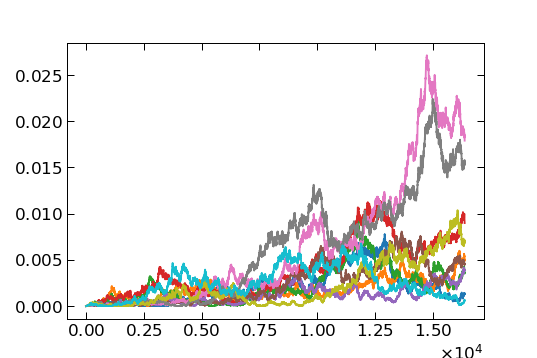

<IPython.core.display.Javascript object>


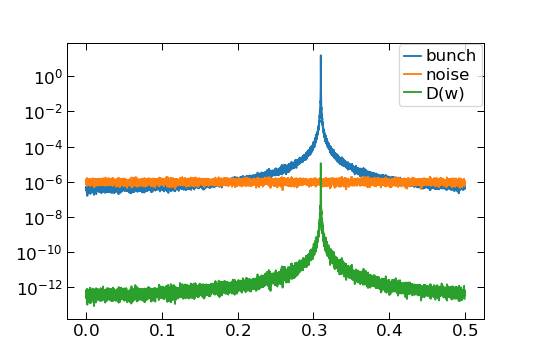

In [70]:
plt.figure()
if Np>10:
    for i in range(min(10,Np)):
        plt.plot((x[:,i]**2+p[:,i]**2)*.5)
else:
    plt.plot(x**2+p**2)
    

plt.figure()
plt.plot(ff,pw2,label='bunch')
plt.plot(ff,Nw2,label='noise')
plt.plot(ff,Dw ,label='D(w)')
plt.yscale('log')
plt.legend(loc=0)


<IPython.core.display.Javascript object>


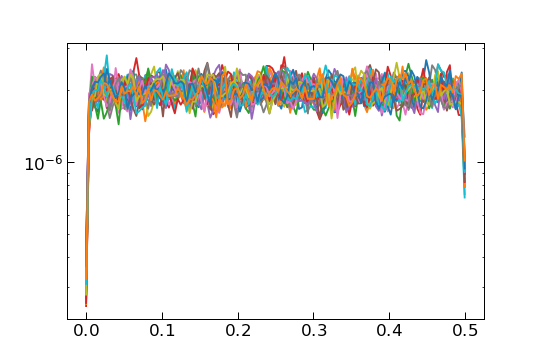

(129,) (16384, 32) (524288,)


<IPython.core.display.Javascript object>


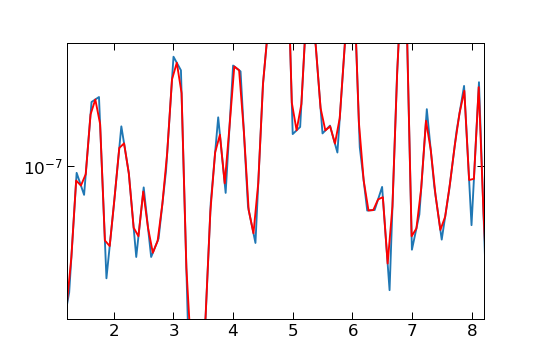

(129,) (16384, 32) (524288,)
8.217475797899716e-08


In [72]:
for i in range(2):
    if i==0: ff,Nw2 = signal.welch(kicks,1/dt,axis=0)
    else:    ff,Nw2 = signal.welch(kicks.flatten(),1/(dt/Np))
    plt.figure(200+i)
    plt.semilogy(ff,Nw2)
    print(ff.shape,kicks.shape,kicks.flatten().shape)
    
    if i==1:
        print(Nw2[1])
#         Nw2[0]=2*Nw2[1]-Nw2[2]
        interp = sc.interpolate.interp1d(ff[0:],Nw2[0:],kind='linear',bounds_error=False,fill_value=(0))
        f2 = np.linspace(0,.5/dt,200)
        plt.semilogy(f2*Np,interp(f2*Np),'r')
        fs = 1/dt
        Nw3 = np.zeros_like(f2)
#         for j in range(0,Np+1,1):
#             print(j*fs)
#             for sign in [-1,1]:
#                 fi = j*fs +sign*f2
#                 Nw3 += interp(fi)
        
#         print(interp(f2*Np+100))
        fi = np.arange(Np)*fs
        for j,f in enumerate(f2):
            Nw3[j]+=np.sum(interp(fi+ f)) + np.sum(interp(fi-f))
                       
        plt.figure(100)
        plt.semilogy(f2,Nw3,'r')
#         print(f2,Nw3)

# Test concatenation

In [32]:
def lowpassNoise(Nx,std,dt,fl=0,fh=1):
    xt= np.random.normal(0,std,Nx)
#     xt = xt.reshape(Nx,1)
    xf= np.fft.rfft(xt)
    ff= np.fft.rfftfreq(Nx,d=dt)
    
    ind = np.logical_or(ff>=fh,ff<=fl)
    xf[ind] = 0
    xt2 = np.fft.irfft(xf,axis=0)
    xt2 = (xt2-np.mean(xt2,axis=0))*std/np.std(xt2,axis=0)
    return xt2
    

dt= 25e-9
Nt=10**3
Nslots=3564
Nx = Nt*Nslots
std = 1e-2
frev = 11245.5
x = lowpassNoise(Nx,std,dt,fl=0,fh=frev)
x2 = np.zeros(Nx)
Nsteps = 20
for step in range(Nsteps):
    start = int(Nx*step/Nsteps+0.5)
    stop  = int(Nx*(step+1)/Nsteps+0.5)
    print(start,stop)
    x2[start:stop] = lowpassNoise(stop-start,std,dt,fl=0,fh=frev)
# x2 = np.concatenate((lowpassNoise(Nx//2,std,dt,fl=0,fh=frev),lowpassNoise(Nx//2,std,dt,fl=0,fh=frev)))
T = np.linspace(0,Nt,Nx,endpoint=False)


0 178200
178200 356400
356400 534600
534600 712800
712800 891000
891000 1069200
1069200 1247400
1247400 1425600
1425600 1603800
1603800 1782000
1782000 1960200
1960200 2138400
2138400 2316600
2316600 2494800
2494800 2673000
2673000 2851200
2851200 3029400
3029400 3207600
3207600 3385800
3385800 3564000


<IPython.core.display.Javascript object>


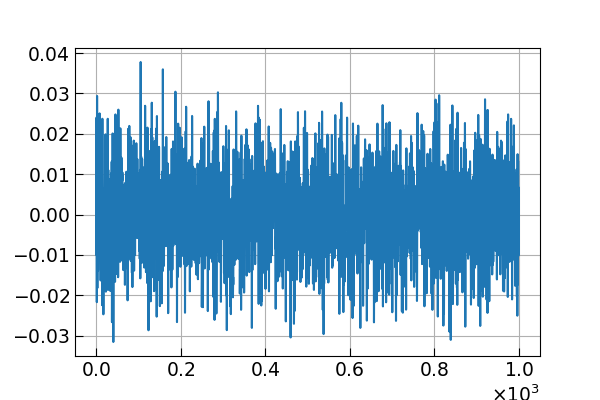

<IPython.core.display.Javascript object>


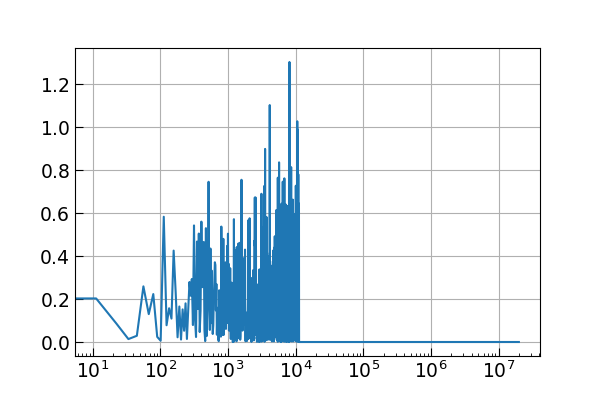

<IPython.core.display.Javascript object>


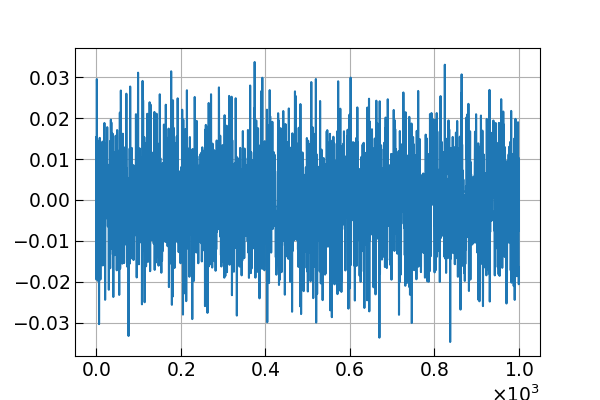

<IPython.core.display.Javascript object>


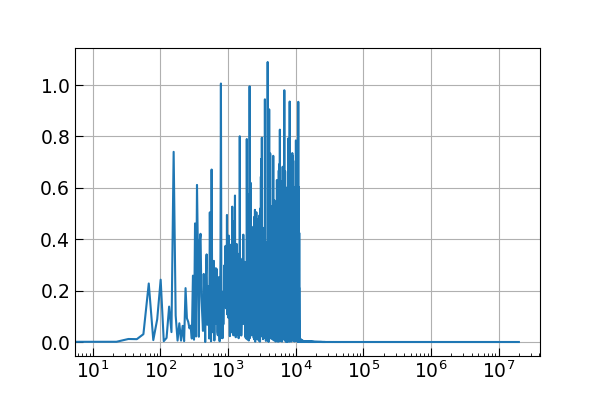

<IPython.core.display.Javascript object>


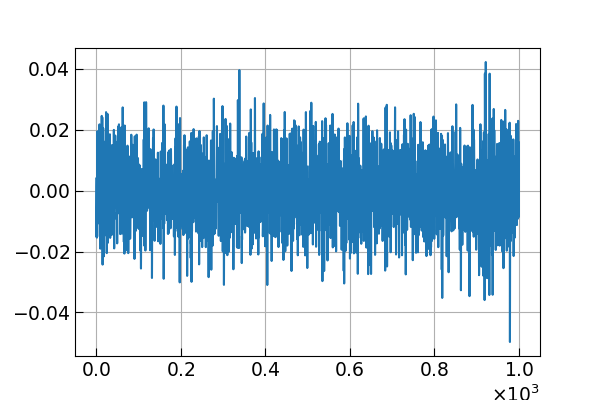

<IPython.core.display.Javascript object>


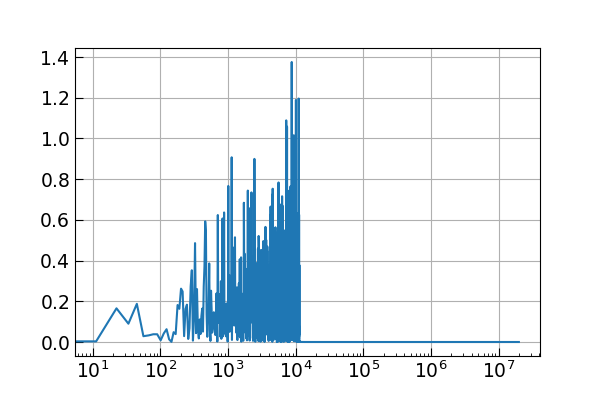

In [48]:
for xi in [x,x2,xc]:
    plt.figure()
    plt.plot(T,xi)
    plt.grid(True)
    
    plt.figure()
    xf= np.fft.rfft(xi,axis=0,norm='ortho')#/Nx#,norm='ortho')
    ff= np.fft.rfftfreq(Nx,d=dt)
    plt.semilogx(ff,np.abs(xf)**2)
    F,P = signal.welch(xi,fs=1/dt,return_onesided=True,nperseg=1024*32)
#     plt.semilogx(F,P)
    plt.grid(True)

<IPython.core.display.Javascript object>


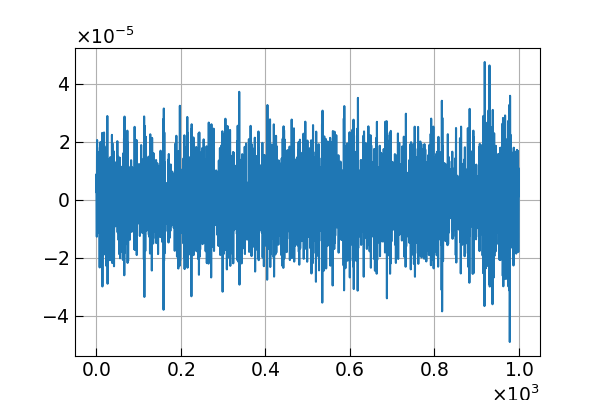

In [47]:
# Concatenating noise

nconc = 10
N = Nx//nconc
phi = pi2*np.arange(N)/N
cosphi = np.cos(phi) 
sinphi = np.sin(phi)



xc = np.zeros(Nx)

shifta =(N*3)//4
shiftb = N

xca1= lowpassNoise(N,std,dt,fl=0,fh=frev)
xca2 = lowpassNoise(N,std,dt,fl=0,fh=frev)
xca3 = lowpassNoise(N,std,dt,fl=0,fh=frev)
xcb1 = lowpassNoise(N,std,dt,fl=0,fh=frev)
xcb2 = lowpassNoise(N,std,dt,fl=0,fh=frev)


xc[0:shifta]  = cosphi[0:shifta]*xca1[0:shifta] 
xc[0:shiftb] += sinphi[0:shiftb]*xcb1[0:shiftb]
xc[-(N-shifta):]    +=sinphi[:(N-shifta)]*xca2[:(N-shifta)]
xc[-N:] += sinphi*xcb2

# xc[shifta:N+shifta] +=sinphi*xca2
# xc[0:shiftb] += sinphi[0:shiftb]*xcb1[0:shiftb]


for i in range(0,nconc-1):
    xcai = lowpassNoise(N,std,dt,fl=0,fh=frev)
    xcbi = lowpassNoise(N,std,dt,fl=0,fh=frev)
    xc[i*N+shifta:(i+1)*N+shifta] += sinphi*xcai
    xc[i*N+shiftb:(i+1)*N+shiftb] += sinphi*xcbi 

plt.figure()
# plt.plot(phi,cosphi)
# plt.plot(phi,sinphi)
# plt.plot(T,xc)
plt.plot(T[:-1],np.diff(xc))
plt.grid(True)

In [11]:
Nx/8

44550.0